# Microscope parameters

How do the microscope parameters change the image?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pyqstem import PyQSTEM
from pyqstem.imaging import CTF
from pyqstem.util import atoms_plot
from ase.cluster.cubic import FaceCenteredCubic

Set up the nanoparticle

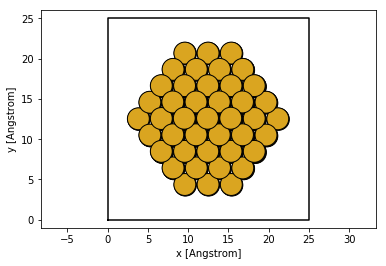

In [2]:
surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)]
layers = [4, 7, 3]
lc = 4.08000
atoms = FaceCenteredCubic('Au', surfaces, layers, latticeconstant=lc)
atoms.rotate(v='y', a=45)
atoms.set_cell(np.eye(3) * 25)
atoms.center()
omega = 45.
alpha=1.
atoms.rotate(v='z',a=omega,center='COP')
atoms.rotate(v='y',a=alpha,center='COP')
atoms.rotate(v='z',a=-omega,center='COP')
atoms_orig = atoms.copy()
atoms_plot(atoms)

In [3]:
qstem=PyQSTEM('TEM')

wave_size = (250, 250)
qstem.set_atoms(atoms)
qstem.build_wave('plane',300,wave_size)
qstem.build_potential(int(atoms.get_cell()[2,2]*2))
qstem.run()
wave=qstem.get_wave()

In [4]:
def myimage(wave, defocus=50, Cs=5*10**4, astig=0, logdose=4, suffix='', scale=1.0):
    aberrations={'a22' : astig, 
                'phi22' : 1.3,}
    ctf = CTF(defocus=defocus,Cs=Cs,focal_spread=30, aberrations=aberrations)
    img_wave=wave.apply_ctf(ctf)
    mtf=[1.0,0.05,0.4, 2.6]
    img=img_wave.detect(dose=10**logdose, blur=1.5, MTF_param=mtf, resample=0.18)
    img -= int(round(img[:20,:20].mean()))
    vmax = max(-img.min(), img.max())
    print("Image range: [{}, {}]   background={}".format(img.min(), img.max(), img[:20,:20].mean()))
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    ax.imshow(img.T,cmap='gray', vmin=-vmax/scale, vmax=vmax/scale)
    ax.axis('off')
    plt.tight_layout()
    filename = f'Au_f={defocus}_Cs={Cs}_astig={astig}_logdose={logdose}{suffix}.png'
    print("File name:", filename)
    fig.savefig(filename, bbox_inches='tight')

Image range: [-44.51793806843067, 59.37588556314503]   background=0.459206817805729
File name: Au_f=50_Cs=50000_astig=0_logdose=4.png


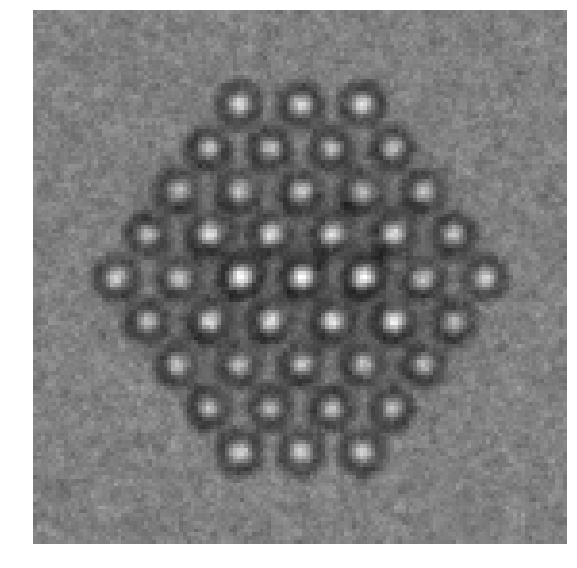

In [5]:
myimage(wave)

Image range: [-59.37149598013342, 46.512277130897445]   background=-0.38472888276326145
File name: Au_f=50_Cs=50000_astig=30_logdose=4.png


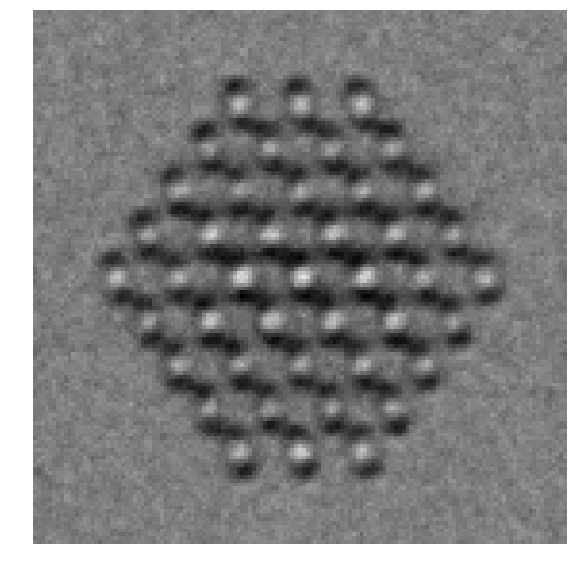

In [6]:
myimage(wave, astig=30)

Image range: [-130.47490366736884, 35.806338902876064]   background=-0.4636110602383703
File name: Au_f=-50_Cs=50000_astig=0_logdose=4.png


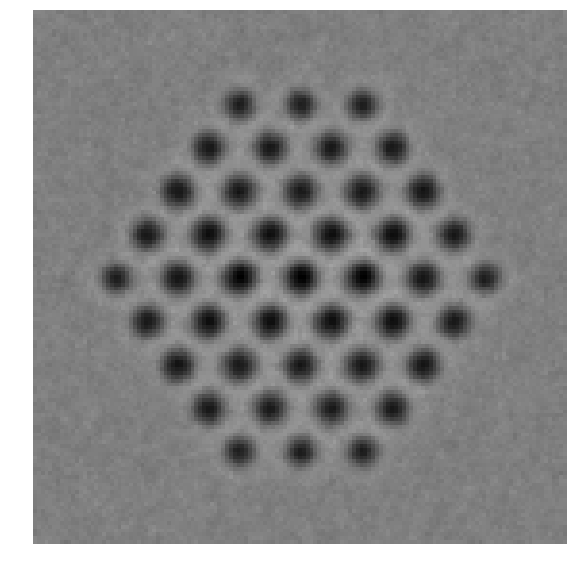

In [7]:
myimage(wave, defocus=-50)

Image range: [-67.96560238390484, 92.28691021690645]   background=0.030469529662681367
File name: Au_f=100_Cs=50000_astig=0_logdose=4.png


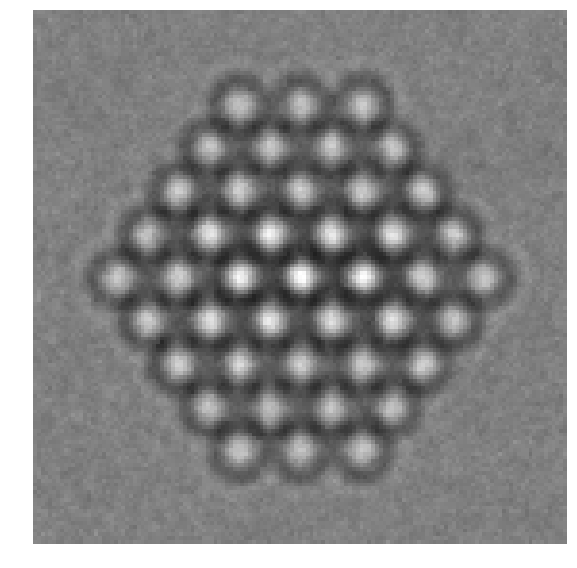

In [8]:
myimage(wave, defocus=100)

Image range: [-4.547857861290095, 5.1828078111730065]   background=-0.346440468686105
File name: Au_f=50_Cs=50000_astig=0_logdose=2.8.png


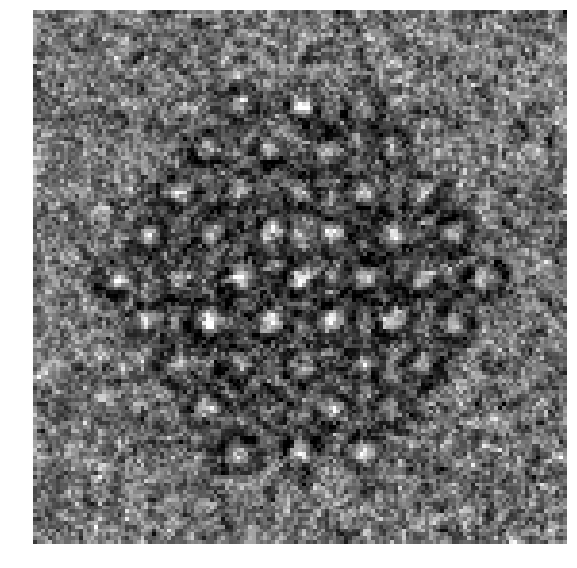

In [9]:
myimage(wave, logdose=2.8, scale=1.5)

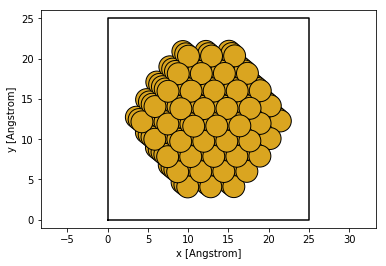

In [10]:
omega = 220
alpha=10.
atoms.rotate(v='z',a=omega,center='COP')
atoms.rotate(v='y',a=alpha,center='COP')
atoms.rotate(v='z',a=-omega,center='COP')
atoms_plot(atoms)

In [11]:
qstem=PyQSTEM('TEM')

wave_size = (200, 200)
qstem.set_atoms(atoms)
qstem.build_wave('plane',300,wave_size)
qstem.build_potential(int(atoms.get_cell()[2,2]*2))
qstem.run()
wave2=qstem.get_wave()

Image range: [-70.78541741502005, 99.5074288895832]   background=-0.11371661059961703
File name: Au_f=50_Cs=50000_astig=0_logdose=4_tilt.png


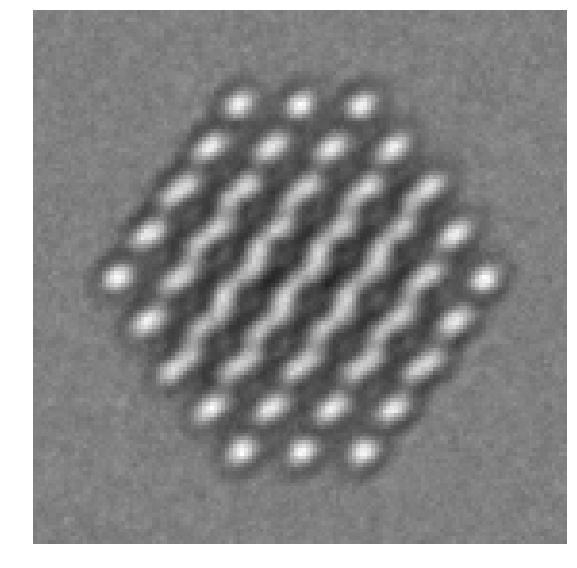

In [12]:
myimage(wave2, suffix='_tilt')

In [14]:
from ase.io import write

atoms2 = atoms_orig.copy()
omega = 220
alpha=-10.
atoms2.rotate(v='z',a=omega,center='COP')
atoms2.rotate(v='y',a=alpha,center='COP')
atoms2.rotate(v='z',a=-omega,center='COP')

write("particle.pov", atoms2)

/Users/schiotz/development/ase/ase/io/pov.py:143: ResourceWarning: unclosed file <_io.TextIOWrapper name='particle.ini' mode='w' encoding='UTF-8'>
  del ini
/Users/schiotz/development/ase/ase/io/pov.py:330: ResourceWarning: unclosed file <_io.TextIOWrapper name='particle.pov' mode='w' encoding='UTF-8'>
  POVRAY(atoms, **parameters).write(filename)
